# Toy Model for computing MI of receptors activity

### 1. Discretization and Phase Space

We consider the most simple model of receptors with potentially two homo-pentamer, and one hetero-pentamer.

* We consider 3 receptors : $(r_1,r_2,r_3)$
* L ligands : $\{\lambda_i\}_{i\in[1,L]}$
* 3 concentrations : $(c_0,c_{1/2},c_1)$

Below an illustration of the binning process:

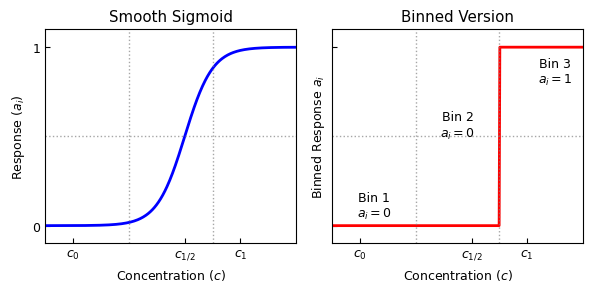

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, k=2, x0=5):
    """
    Calculates the sigmoid function.
    
    Args:
        x (float or np.array): Input value(s).
        k (float): Steepness of the curve.
        x0 (float): Midpoint (c_1/2) of the curve.
        
    Returns:
        float or np.array: Sigmoid output(s).
    """
    return 1 / (1 + np.exp(-k * (x - x0)))

# --- 1. Setup Data and Parameters ---

# Define the representative concentration points
c0 = 1.
c_half = 5.
c1 = 7.

# Define the X-bin thresholds halfway between the points
# Bin 1: x < t1
# Bin 2: t1 <= x < t2
# Bin 3: x >= t2
t1 = (c0 + c_half) / 2.0  # Threshold 1 = 4.0
t2 = (c_half + c1) / 2.0  # Threshold 2 = 6.0

# Define the Y-bin threshold (for visualization)
y_thresh = 0.5

# Generate x values for plotting
x = np.linspace(0, 10, 400)

# --- 2. Generate Plot Data ---

# Plot 1: Smooth sigmoid
y_smooth = sigmoid(x, k=2, x0=c_half)

# Plot 2: Binned version
# The y-value is 0 for the first two bins, and 1 for the third bin
y_binned = np.zeros_like(x)
y_binned[(x >= t1) & (x < t2)] = 0  # Bin 2 -> Value 0
y_binned[x >= t2] = 1             # Bin 3 -> Value 1

# --- 3. Create Plots ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

# Define grid styles
grid_style = {'color': 'gray', 'linestyle': ':', 'linewidth': 1.0, 'alpha': 0.7}

# === Plot 1: Smooth Sigmoid ===
ax1.plot(x, y_smooth, 'b-', label='Smooth Sigmoid S(x)', linewidth=2)

# Add grid lines for bins
ax1.axvline(x=t1, **grid_style)
ax1.axvline(x=t2, **grid_style)
ax1.axhline(y=y_thresh, **grid_style)

# Add labels for representative points
ax1.set_xticks([c0, c_half, c1],[r'$c_0$', r'$c_{1/2}$', r'$c_1$'])
ax1.set_yticks([0,1])


# Aesthetics
ax1.set_title('Smooth Sigmoid')
ax1.set_xlabel('Concentration '+r'$(c)$')
ax1.set_ylabel('Response '+r'$(a_i)$')
#ax1.legend()
#ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim(-0.1, 1.1)
ax1.set_xlim(0, 9)

# === Plot 2: Binned Version ===
ax2.plot(x, y_binned, 'r-', label='Binned Value B(x)', linewidth=2)

# Add grid lines for bins
ax2.axvline(x=t1, **grid_style)
ax2.axvline(x=t2, **grid_style)
ax2.axhline(y=y_thresh, **grid_style)

# Add text to show the binned values
ax2.text(t1 / 2, 0.05, 'Bin 1\n'+r'$a_i = 0$', ha='center')
ax2.text((t1 + t2) / 2, 0.5, 'Bin 2\n'+r'$a_i = 0$', ha='center')
ax2.text((t2 + 10) / 2, 0.8, 'Bin 3\n'+r'$a_i = 1$', ha='center')

# Aesthetics
ax2.set_title('Binned Version')
ax2.set_xlabel('Concentration '+r'$(c)$')
ax2.set_ylabel('Binned Response '+r'$a_i$')

ax2.set_xlim(0,9)

ax2.set_xticks([c0, c_half, c1],[r'$c_0$', r'$c_{1/2}$', r'$c_1$'])



# --- 4. Show Plot ---
plt.tight_layout()
plt.show()

Consequently, an activity curve is defined by three numbers :
$$
a_i(c_j) = (a_i^0a_i^{1/2}a_i^1),
$$
which results in theory in $2^3 = 8$ possibilities. Except that the activity curve  is constrained to be strictly monotonous, thus reducing the phase space of one activity curve to 4 possibilities :
$$
a_i \in \{(000),(001),(011),(111)\}.
$$

### 2. Model of Hetero-Pentamer Channels
We propose a specific model of channel, where $r_1$ and $r_2$ are two homo-pentamer. In general, $r_1$ has a higher binding affinity with the ligands than $r_2$, whereas the hetero-pentamer $r_3$ is always in between $r_1$ and $r_2$. Given this set of rules, we find the following possibilities for the curve response of each receptors:

In [36]:
# r_0 >= r_2 >= r_1 and r_0>=r_1
A = np.array([# a_0 = (111)
    [[1,1,1],[0,0,0],[0,0,0]],[[1,1,1],[0,0,0],[0,0,1]],[[1,1,1],[0,0,0],[0,1,1]],[[1,1,1],[0,0,0],[1,1,1]], # a_1=(000)
    [[1,1,1],[0,0,1],[0,0,1]],[[1,1,1],[0,0,1],[0,1,1]],[[1,1,1],[0,0,1],[1,1,1]],                           # a_1=(001)
    [[1,1,1],[0,1,1],[0,1,1]],[[1,1,1],[0,1,1],[1,1,1]],                                                     # a_1=(011)
    [[1,1,1],[1,1,1],[1,1,1]],                                                                               # a_1=(111)
    # a_0 = (011)
    [[0,1,1],[0,0,0],[0,0,0]],[[0,1,1],[0,0,0],[0,0,1]],[[0,1,1],[0,0,0],[0,1,1]],                           #a_1=(000)
    [[0,1,1],[0,0,1],[0,0,1]],[[0,1,1],[0,0,1],[0,1,1]],                                                     #a_1=(001)
    [[0,1,1],[0,1,1],[0,1,1]],                                                                               #a_1=(011)
    #a_0 = (001)
    [[0,0,1],[0,0,0],[0,0,0]],[[0,0,1],[0,0,0],[0,0,1]],                                                     #a_1=(000)
    [[0,0,1],[0,0,1],[0,0,1]],                                                                               #a_1=(001)
    #a_0 = (000)
    [[0,0,0],[0,0,0],[0,0,0]]                                                                                #a_1=(000)
    ])

In [40]:
# other compatible scenario, depending on if the afinity ranking is strict or not.
names = list()
names.append("r_0 >= r_2 >= r_1 & r_0>=r_1")
names.append("r_0 > r_2 > r_1 & r_0>r_1")
# r_0 > r_2 > r_1 & r_0>r_1
A_strict_012 = list()
for a in A :
    if any(a[0] != a[1]) and any(a[0] != a[2]) and any(a[1] != a[2]):
        A_strict_012.append(a)
A_strict_012 = np.array(A_strict_012)

# r_0 > r_2 >= r_1 & r_0>=r_1
names.append("r_0 > r_2 >= r_1 & r_0>=r_1")
A_strict_02 = list()
for a in A :
    if any(a[0] != a[2]):
        A_strict_02.append(a)
A_strict_02 = np.array(A_strict_02)

# r_0 >= r_2 >= r_1 & r_0>r_1
names.append("r_0 >= r_2 >= r_1 & r_0>r_1")
A_strict_01 = list()
for a in A :
    if any(a[0] != a[1]):
        A_strict_01.append(a)
A_strict_01 = np.array(A_strict_01)

# r_0 >= r_2 > r_1 & r_0 >=r_1
names.append("r_0 >= r_2 > r_1 & r_0 >=r_1")
A_strict_12 = list()
for a in A :
    if any(a[1] != a[2]):
        A_strict_12.append(a)
A_strict_12 = np.array(A_strict_12)

As = [A,A_strict_012,A_strict_01,A_strict_02,A_strict_02]

for name,a in zip(names,As):
    print(name)
    print(a.shape)

r_0 >= r_2 >= r_1 & r_0>=r_1
(20, 3, 3)
r_0 > r_2 > r_1 & r_0>r_1
(4, 3, 3)
r_0 > r_2 >= r_1 & r_0>=r_1
(16, 3, 3)
r_0 >= r_2 >= r_1 & r_0>r_1
(10, 3, 3)
r_0 >= r_2 > r_1 & r_0 >=r_1
(10, 3, 3)


**How to read A:** Each entry of A ```A[j]``` is a $3x3$ matrix that encodes the activity curves of each of the three receptors, for a given ligand $\lambda_j$. Each line of the matrix: ```A[j,i]``` corresponds to the activity curve of the the receptor $r_i$ in response to the ligand $\lambda_j$.
**Response to a Ligand:** Given a ligand, and a concentration $c_j$, the octopus reads the response $\left[ a_0^{c_j},a_1^{c_j},a_2^{c_j} \right]$, which is provided by ```A[j,:,k]```, where $k=0 \Rightarrow c_0$, $k=1 \Rightarrow c_{1/2}$, $k=2 \Rightarrow c_1$

### 3. Compute probability distribution

We study the mutual information between an activity and the corresponding ligand/concentration value. During all our computations, we assume that each ligand, and concentration value is equiprobable.

* $\mathbf{P(\mathcal{L})}$: We have ```A.shape[0] * A.shape[1] ``` numbers of different ligands/concentration, leading ```P = lambda L : 1/A.shape[0]*1/A.shape[1]```. On the other hand, we look into the diversity of activity measurements.
* $\mathbf{P(\mathcal{A})}$: Given the prior $P(L)=\text{cte}$, the probability of obtaining a specific response is proportional to the multiplicity of the response, called $M_\mathcal{A}$. We compute it in the next cell.


<table style="border: none; border-collapse: collapse; font-family: monospace; font-size: 1.2em; text-align: center;">
  <thead>
    <tr>
      <td style="border: none;"></td> <td style="border: none;"></td> <td style="border: none; padding-bottom: 5px; font-style: italic;">A(c<sub>1/2</sub><sup>j</sup>)</td> <td style="border: none;"></td> </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: none; padding-right: 10px;"></td> <td style="border: none; padding: 0px;">a<sub>0</sub><sup>c<sub>0</sub><sup>j</sup></sup></td>
      <td style="padding: 0px; border: 2px solid red;">a<sub>0</sub><sup>c<sub>1/2</sub><sup>j</sup></sup></td>
      <td style="border: none; padding: 0px;">a<sub>0</sub><sup>c<sub>1</sub><sup>j</sup></sup></td>
    </tr>
    <tr>
      <td style="border: none; padding-right: 10px;">A =</td> <td style="border: none; padding: 0px;">a<sub>1</sub><sup>c<sub>0</sub><sup>j</sup></sup></td>
      <td style="padding: 0px; border: 2px solid red;">a<sub>1</sub><sup>c<sub>1/2</sub><sup>j</sup></sup></td>
      <td style="border: none; padding: 0px;">a<sub>1</sub><sup>c<sub>1</sub></sup><sup>j</sup></td>
    </tr>
    <tr>
      <td style="border: none; padding-right: 10px;"></td> <td style="border: none; padding: 0px;">a<sub>2</sub><sup>c<sub>0</sub><sup>j</sup></sup></td>
      <td style="padding: 0px; border: 2px solid red;">a<sub>2</sub><sup>c<sub>1/2</sub><sup>j</sup></sup></td>
      <td style="border: none; padding: 0px;">a<sub>2</sub><sup>c<sub>1</sub><sup>j</sup></sup></td>
    </tr>
  </tbody>
</table>

In [41]:
from collections import Counter
# convert all the As, into an array of tuples, where each tuple is a column : corresponding to one 
A_tuples = [[tuple([int(a[i,0,k]),int(a[i,1,k]),int(a[i,2,k])]) for i in range(a.shape[0]) for k in range(a.shape[2])] for a in As]
# Transform it into a counter dictionnary, that counts the number of occurence of each reponse signal
Probs = [Counter(a) for a in A_tuples]
# compute the total number of occurence
Counter_tot = [0 for _ in range(Probs.__len__())]
for i in range(Probs.__len__()):
    for key,values in Probs[i].items():
        Counter_tot[i]+= values
print(Counter_tot)
# divide to obtain probabilities
for i in range(Probs.__len__()):
    for key,values in Probs[i].items():
        Probs[i][key] /= Counter_tot[i]

for name,Pr in zip(names,Probs):
    print(name)
    for A,P in Pr.items():
        print(f"P({A}) = {P:.3f}")

[60, 12, 48, 30, 30]
r_0 >= r_2 >= r_1 & r_0>=r_1
P((1, 0, 0)) = 0.250
P((1, 0, 1)) = 0.250
P((1, 1, 1)) = 0.250
P((0, 0, 0)) = 0.250
r_0 > r_2 > r_1 & r_0>r_1
P((1, 0, 0)) = 0.417
P((1, 0, 1)) = 0.417
P((1, 1, 1)) = 0.083
P((0, 0, 0)) = 0.083
r_0 > r_2 >= r_1 & r_0>=r_1
P((1, 0, 0)) = 0.312
P((1, 0, 1)) = 0.312
P((1, 1, 1)) = 0.188
P((0, 0, 0)) = 0.188
r_0 >= r_2 >= r_1 & r_0>r_1
P((1, 0, 0)) = 0.500
P((1, 0, 1)) = 0.167
P((1, 1, 1)) = 0.167
P((0, 0, 0)) = 0.167
r_0 >= r_2 > r_1 & r_0 >=r_1
P((1, 0, 0)) = 0.500
P((1, 0, 1)) = 0.167
P((1, 1, 1)) = 0.167
P((0, 0, 0)) = 0.167




### 4. Mutual Information

The response signal of the sensory neurons of the octopus is supposed to provide information about the type of ligand, and its concentration to the octopus. We thus investigate the mutual information ($MI$) between a response signal, and the corresponding $c_j$ that caused that signal:
$$
\begin{aligned}
MI(\mathcal{A};\mathcal{L}) &= MI(\overbrace{a_0a_1a_2}^\mathcal{A} ; \underbrace{[[c_0^0c_{1/2}^0c_1^0] \dots [c_0^jc_{1/2}^jc_1^j] \dots [c_0^Lc_{1/2}^Lc_1^L]]}_{\mathcal{L}\text{ that contains } 3L \text{ numbers}}) \\
&= H(\mathcal{A}) - H(\mathcal{A} | \mathcal{L}) \\
&= H(\mathcal{L}) - H(\mathcal{L} | \mathcal{A})
\end{aligned}
$$
$H(X) = -\sum_{X\in\chi} P(X) \log[ P(X) ]$ denotes the entropy, and $H(X |Y) = \sum_{x\in\chi} \sum_{y\in\mathcal{Y}} P(x,y) \log\left[\frac{P(y,y)}{P(x)}\right]$ the conditional entropy.
We can first write the first obvious one:
$$
H(\mathcal{L}) = \log(3L)
$$
Next, we have to evaluate the probability : $P(\mathcal{A},\mathcal{L})$, that we can obtain in two ways:
$$
\begin{aligned}
P(\mathcal{A},\mathcal{L}) &= P(\mathcal{A}) P(\mathcal{L}|\mathcal{A}) \\
&= P(\mathcal{L}) P(\mathcal{A}|\mathcal{L})
\end{aligned}
$$
Let us evaluate all of these probabilities. First, we previously computed $P(\mathcal{A})$, and $P(\mathcal{L})$. Next the conditional probabilities, first we got the obvious:
$$
P(\mathcal{A} | \mathcal{L}) = \delta_{\mathcal{A}_\mathcal{L},\mathcal{A}}
$$
Because the activity is determined by the ligand, the probability is only non-zero when the value of $\mathcal{A}$ is the one of $\mathcal{L}$.
Next,we got
$$
P(\mathcal{L}|\mathcal{A}) = \frac{1}{M_\mathcal{A}}\delta_{\mathcal{A}_\mathcal{L},\mathcal{A}},
$$
Indeed, the $\delta$ comes from the fact that if $\mathcal{A} \neq \mathcal{A}_\mathcal{L}$ the probability of having that $\mathcal{L}$ is 0, then there is an equal probability to obtain any of the $\mathcal{L}$ that is compatible with that $\mathcal{A}$.

As a result, the joint probability is:
$$
P(\mathcal{A},\mathcal{L}) = \frac{1}{3L} \delta_{\mathcal{A}_\mathcal{L},\mathcal{A}}
$$

We write the mutual information in term of the probability distributions:
$$
MI(\mathcal{A};\mathcal{L}) = H(\mathcal{L}) - H(\mathcal{L}|\mathcal{A})
$$

$$
H(\mathcal{L}) = - \sum_{i=1}^L \sum_{\mathcal{L}_i = 0}^2 P(\mathcal{L_i}) \log(P(\mathcal{L_i})) = \log(3L)
$$

$$
\begin{aligned}
H(\mathcal{L}|\mathcal{A}) &= - \sum_{i=1}^L \sum_{\mathcal{A}\in A} P(\mathcal{L},\mathcal{A}) \log\left[P(\mathcal{L} |\mathcal{A})\right] \\
& = \sum_\mathcal{A} \frac{M_\mathcal{A}}{3L} \log(M_\mathcal{A})
\end{aligned}
$$

Finally :

$$
MI[\mathcal{A};\mathcal{L}] = \log(3L) - \sum_\mathcal{A} \frac{M_\mathcal{A}}{3L} \log(M_\mathcal{A})
$$

In [42]:
MI = [float(np.log2(A.shape[0] * A.shape[1]) - np.sum(entr( list(Pr.values()) ))/(A.shape[0]*A.shape[1])) for Pr,A in zip(Probs,As)]

for name,mi in zip(names,MI):
    print(name)
    print(mi)
    print()

r_0 >= r_2 >= r_1 & r_0>=r_1
5.883785689589854

r_0 > r_2 > r_1 & r_0>r_1
3.4896534682689686

r_0 > r_2 >= r_1 & r_0>=r_1
5.556739366997866

r_0 >= r_2 >= r_1 & r_0>r_1
4.8654754847787185

r_0 >= r_2 > r_1 & r_0 >=r_1
4.8654754847787185



### 5. Decomposition of the Mutual Information
#### 5.1 General formula
We start by deriving a general relation between mutual information and the interactive information. Considering the multivariate mutual information:
$$
MI[(X_0,X_1);Y] = MI(X_0;Y) + MI(X_1;Y | X_0).
$$
Which simply comes from the expression of the mutual information in term of entropy:
$$
MI[(X_0,X_1);Y] = \underbrace{H(X_0,X_1)}_{H(X_0​)+H(X_1​∣X_0​)} - \overbrace{H[(X_0,X_1)|Y]}^{H(X_0 | Y) +H(X_1 | X_0; Y)} = \underbrace{H(X_0) - H(X_0 | Y)}_{MI(X_0;Y)} + \overbrace{H(X_1|X_0) - H(X_1 | X_0, Y)}^{MI(Y;X_1 | X0)}.
$$
Next, we write the fundamental equation defining the interaction information:
$$
II(X_0; \cdots ; X_{n+1}) = II(X_0; \cdots ;X_n) - II(X_0; \cdots ; X_n| X_{n+1})
$$
Notice that for $n=2$, this definition coincide with mutual information: $II(X_0;X_1) = MI(X_0;X_1)$, and $II(X_0;X_1 | Y) = MI(X_0;X_1 | Y)$. 

#### 5.2 Application to the activity
We apply our decomposition to our mutual information of interest:
$$
MI(\mathcal{A};\mathcal{L}) = MI[(a_0,a_1,a_2) ; \mathcal{L}] = \underbrace{\sum_{i=0}^2 MI(a_i; \mathcal{L})}_\text{individual MI} \overbrace{ - \sum_{0\le i < j \le 2} II(a_i;a_j;\mathcal{L})}^{\substack{\text{remove the redudant info if II>0} \\ \text{add the synergestic information if II<0}}} + \underbrace{II(a_0;a_1;a_2;\mathcal{L})}_\text{but add the three variables synergies}
$$
Finally, after expending, and simplifying we got:
$$
MI[(a_0,a_1,a_2); \mathcal{L}] = \sum_{i=0}^2 MI(a_i; \mathcal{L}) - II(a_0;a_1;\mathcal{L}) - II(a_0 ; a_2; \mathcal{L}) - II(a_1;a_2;\mathcal{L} | a_0)
$$


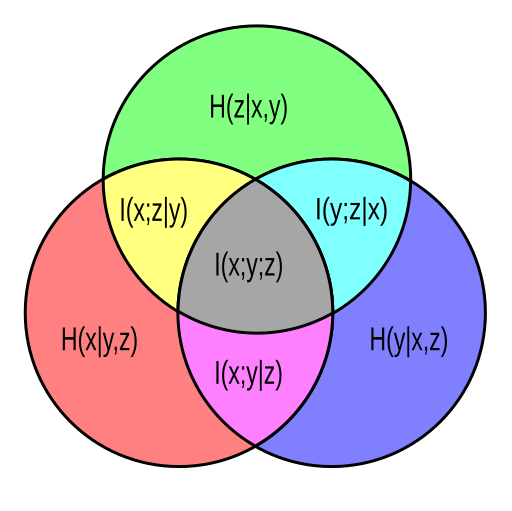

In [ ]:
from IPython.display import Image
Image('VennInfo3Var.png', width=300)